In [1]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt
from math import pi, cos, sin
%matplotlib inline

In [2]:
def plotellipse(Q, k):
    # find eigenvalues/eigenvectors and eigenvector matrix
    w, v = linalg.eig(Q)
    S = np.array([v[:,1],v[:,0]])

    # find s1s2 coordinates of vertices and covertices
    a=np.sqrt(k/w[1])       # semimajor axis length
    b=np.sqrt(k/w[0])       # semiminor axis length
    b1 = [-1.*a, 0]          
    b2 = [1.*a, 0]
    b3 = [0, -1.*b]
    b4 = [0, 1.*b]

    # find xy coordinates of vertices and covertices
    i1 = np.matmul(S, b1)
    i2 = np.matmul(S, b2)
    i3 = np.matmul(S, b3)
    i4 = np.matmul(S, b4)

    # find rotation angle of ellipse from one of the vertices
    t_rot = np.arctan2(i2[1], i2[0])

    # find ellipse in s1s2 coordinate system
    t = np.linspace(0, 2*pi, 1000)
    Ell = np.array([a*np.cos(t) , b*np.sin(t)])

    # define rotation matrix    
    R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  #2-D rotation matrix

    # apply rotation to find ellipse in xy coordinate system    
    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
    
    # plot the initial ellipse on the left
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(121)
    ax1.plot(Ell[0,:], Ell[1,:] , 'k-')
    ax1.plot([b1[0],b2[0]],[b1[1],b2[1]],'k--')
    ax1.plot([b3[0],b4[0]],[b3[1],b4[1]],'k--')
    ax1.plot(b1[0],b1[1],'black',marker='.', markersize=10, linestyle='None')
    ax1.plot(b2[0],b2[1],'black',marker='.', markersize=10, linestyle='None')
    ax1.plot(b3[0],b3[1],'black',marker='.', markersize=10, linestyle='None')
    ax1.plot(b4[0],b4[1],'black',marker='.', markersize=10, linestyle='None')
    ax1.set_xlabel(r'$s_1$', fontsize=14)
    ax1.set_ylabel(r'$s_2$', fontsize=14)
    ax1.axhline(linewidth=0.5, color='k')
    ax1.axvline(linewidth=0.5, color='k')

    # plot the rotated ellipse on the right
    ax2 = fig.add_subplot(122, sharex=ax1,sharey=ax1)
    ax2.plot(Ell_rot[0,:], Ell_rot[1,:],'k-' )
    ax2.plot([i1[0],i2[0]],[i1[1],i2[1]],'k--')
    ax2.plot([i3[0],i4[0]],[i3[1],i4[1]],'k--')
    ax2.plot(i1[0],i1[1],'black',marker='.', markersize=10, linestyle='None')
    ax2.plot(i2[0],i2[1],'black',marker='.', markersize=10, linestyle='None')
    ax2.plot(i3[0],i3[1],'black',marker='.', markersize=10, linestyle='None')
    ax2.plot(i4[0],i4[1],'black',marker='.', markersize=10, linestyle='None')
    ax2.set_xlabel(r'$x$', fontsize=14)
    ax2.set_ylabel(r'$y$', fontsize=14)
    ax2.axhline(linewidth=0.5, color='k')
    ax2.axvline(linewidth=0.5, color='k')

    # display the plot of both ellipses
    plt.show()

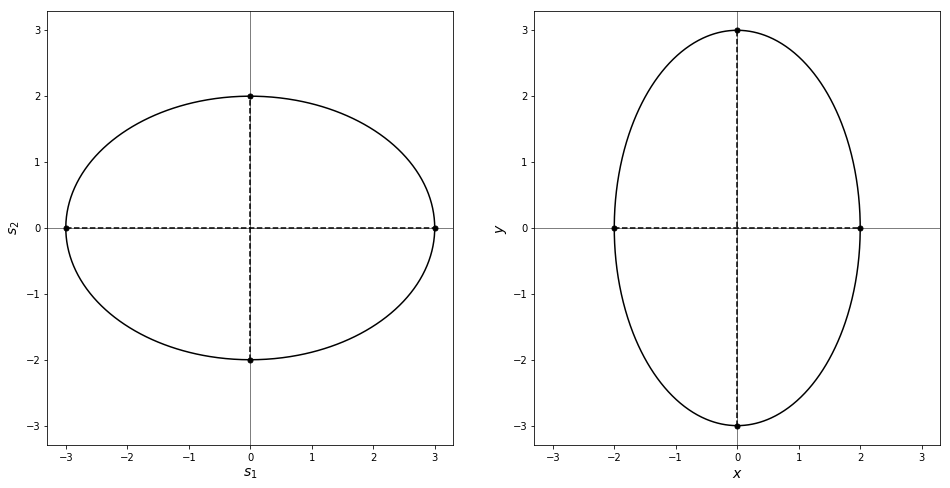

In [5]:
# Example 6.2
Q = np.array([[1./4., 0.], [0., 1./9.]])
k = 1

# Example 6.3
#Q = np.array([[5, -2], [-2, 2]])
#k = 1

# Additional Example - circle of radius 2
#Q = np.array([[1./4., 0], [0, 1./4.]])
#k = 1

plotellipse(Q, k)

# OTHERSTUFF

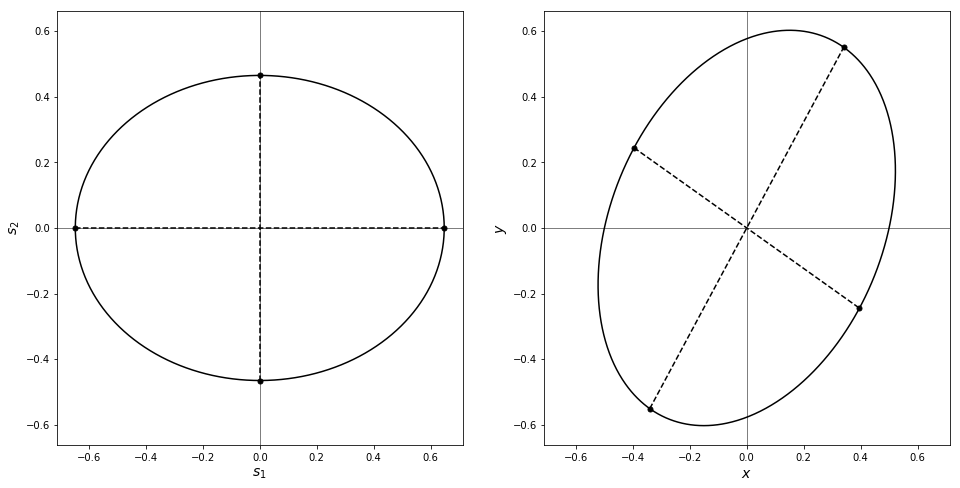

In [4]:







































# Additional Example - circle
Q = np.array([[4., -1], [-1, 3.]])
k = 1

plotellipse(Q, k)